4.Connected Components: Binarize the image quote.png and count the total number of char-
acters excluding punctuations using connected component analysis.

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Histogram function
def Histogram(img):
    levels=[]
    for x in range(256):
        levels.append(x)
    width,height=img.size
    counts=[]
    #for each intensity value
    for i in levels:
        temp=0
        for x in range(width):
          for y in range(height):
            if (img.getpixel((x,y))==i):
              temp=temp+1
        counts.append(temp)
    return counts

In [4]:
def weight(A,n):
    wt=sum(A)/n
    return wt

def mean(A):
    mu=0
    for i in range(len(A)):
        mu+=i*A[i]
    if sum(A)==0:
        return 0
    return mu/sum(A)

def mean2(A):
    mu=0
    for i in range(len(A)):
        mu+=i*A[i]
    return mu


def otsu_bet(hist):
    for i in range(len(hist)):
        threshold=i
        if threshold==0:
            A=hist[:threshold+1]
            B=hist[threshold+1:]
            wt_A=weight(A,sum(hist))
            wt_B=weight(B,sum(hist))
            mean_A=mean2(A)/wt_A if wt_A!=0 else 0
            mean_B=(mean2(hist)-mean2(A))/wt_B if wt_B!=0 else 0
#             var_A=var(A,mean_A)
#             var_B=var(B,mean_B)
            bet_var=wt_A*wt_B*(mean_A-mean_B)*(mean_A-mean_B)
            bet_var_max=bet_var
            otsu_thres=threshold
        else:
            A=hist[:threshold+1]
            B=hist[threshold+1:]
            wt_A=weight(A,sum(hist))
            wt_B=weight(B,sum(hist))
            mean_A=mean2(A)/wt_A if wt_A!=0 else 0
            mean_B=(mean2(hist)-mean2(A))/wt_B if wt_B!=0 else 0
#             var_A=var(A,mean_A)
#             var_B=var(B,mean_B)
            bet_var=wt_A*wt_B*(mean_A-mean_B)*(mean_A-mean_B)
            if bet_var > bet_var_max:
                otsu_thres=threshold
                bet_var_max=bet_var
    return otsu_thres

In [5]:
#Image binarization function
def binarize_img(img, thres):
    row, col = img.size
#     bin_image = np.array(img)#np.zeros((row, col))
    bin_image = np.zeros((col,row))
    for i in range(0,row):
        for j in range(0,col):
            if img.getpixel((i,j)) >= thres:
                bin_image[j,i] = 1
            else:
                bin_image[j,i] = 0
    return bin_image

In [6]:
def update_matrix(img,x,y,value,max_value):
#     print(value)
    row_1, col_1 = img.shape 
    for i in range(row_1):
        for j in range(col_1):
#             print(img[i,j])
            if img[i,j] == max_value:
                img[i,j]= value
#                 print(i,j)
    return img

In [7]:
def connected(imbin):
    row, col = imbin.shape 
    region_label = np.zeros((row, col))
    region_cnt=0
    for i in range(row):
        for j in range(col):
            if imbin[i,j] == 1:
                if(i==0) and (j==0):
                    region_cnt=region_cnt+1
                    region_label[i,j]=region_cnt
                elif(i==0):
                    if (imbin[i,j-1]==0):
                        region_cnt=region_cnt+1
                        region_label[i,j]=region_cnt
                    else:
                        region_label[i,j]=region_label[i,j-1]
                elif(j==0):
                    if (imbin[i-1,j]==0):
                        region_cnt=region_cnt+1
                        region_label[i,j]=region_cnt
                    else:
                        region_label[i,j]=region_label[i-1,j]   
                elif (imbin[i,j-1]==0) and (imbin[i-1,j]==0):
                    region_cnt=region_cnt+1
                    region_label[i,j]=region_cnt
#                     dict[region_count]=[i,j]
                elif imbin[i,j-1]==1 and imbin[i-1,j]==0:
                    region_label[i,j]=region_label[i,j-1]
                elif imbin[i,j-1]==0 and imbin[i-1,j]==1:
                    region_label[i,j]=region_label[i-1,j]
                else:
                    if region_label[i-1,j]!=region_label[i,j-1]:
                        min_value=min(region_label[i-1,j],region_label[i,j-1])
                        max_value = max(region_label[i-1,j],region_label[i,j-1])
#                         region_label[i,j]= min(region_label[i-1,j],region_label[i,j-1])
                        region_label[i,j]=min_value
                        region_label=update_matrix(region_label,i,j,min_value,max_value )
#                         print(i,j)
                    else:
                        region_label[i,j]=region_label[i-1,j]
            
#                 print(region_label)
                        
    return region_label, region_cnt
    

In [7]:
# def size_region(reg_img,reg_count):
#     row,col = reg_img.shape
#     reg_size= np.zeros(reg_count)
#     for i in range(row):
#         for j in range(col):
#             if reg_img[i,j]!=0:
# #                 print(reg_img[i,j])
#                 indx=int(reg_img[i,j]-1)
#                 reg_size[indx]=reg_size[indx]+1
#     return reg_size
                
            

In [8]:
im=Image.open('quote.png')

In [9]:
hist_img=Histogram(im)
otsu_thres2=otsu_bet(hist_img)
otsu_thres2

142

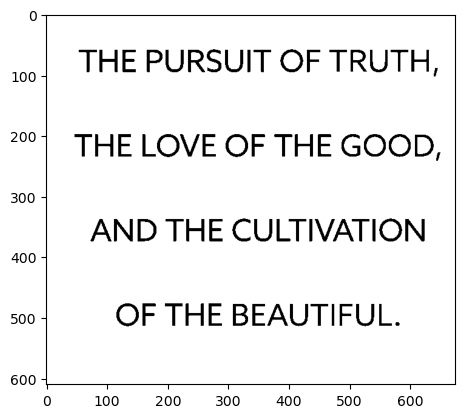

In [10]:
binary_image=binarize_img(im,otsu_thres2)
binary_image
plt.imshow(binary_image,cmap='gray')

In [11]:
img_array=np.array(1-binary_image)

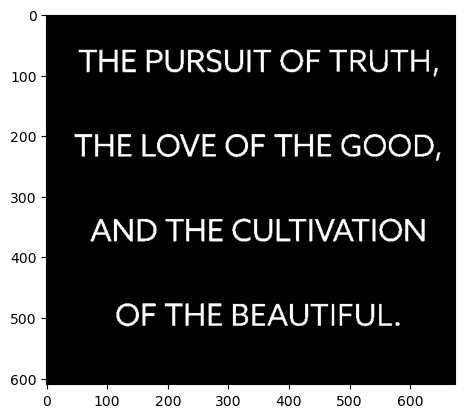

In [12]:
plt.imshow(img_array,cmap='gray')

In [13]:
label_out=connected(img_array)

In [14]:
label_out_0=label_out[0]

In [15]:
label_out_1=label_out[1]
# label_out_1

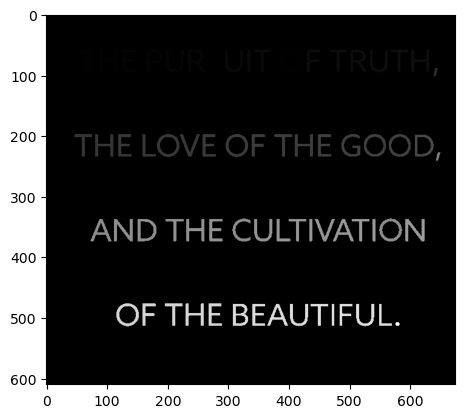

In [16]:
plt.imshow(label_out_0,cmap='gray')

In [17]:
levels=np.arange(1,label_out[1]+1)
width,height=label_out[0].shape
counts=[]
#for each intensity value
for i in levels:
    temp=0
    for x in range(width):
      for y in range(height):
        if (label_out[0][x,y]==i):
          temp=temp+1
    counts.append(temp)

In [18]:
#Thresholding for punctuation marks
count_comp = np.count_nonzero(np.array(counts) > 60)
# count_comp

In [19]:
print(count_comp)

64
